# DSCI 100 Individual Project Plan by Jiangche Xiong

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## 1. Data Discription

### 1.1 Summary for `players.csv`

General information
- Number of observations: 196

- Number of variables: 7

- Purpose: Contains player profile and activity data.


| Variable Name | Type | Description |
|----------------|------|--------------|
| experience | chr | Player experience level  |
| hashedEmail | chr | Unique identifier (hashed email) for linking datasets |
| name | chr | Player name |
| gender | chr | Player gender identity |
| subscribe | lgl  | Whether the player has an active subscription |
| played_hours | dbl | Total number of hours played | 
| Age | dbl | Player age | 

### 1.2 Potential issues

- Missing Data: 2 missing entries for `Age`.
- Most players are Male, indicates that gender may not be a good predictor
- Many players who set up an account but play 0 hours, which might not be helpful to our prediction.

## 2. General Question

Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specification：Given the  two numerical `Age`, and `gender` as predictors, which one can give the most accurate prediction, i.e. smallest RMSPE, on the subscription? Do these relationships differ across experience levels (Amateur, Intermediate, Professional, etc.)?

## 3. Exploratory Data Analysis and Visualization

### 3.1 Load the datasets into R

In [3]:

players <- read_csv("https://raw.githubusercontent.com/Zncufeauag1/DSCI-Project-Plan/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/Zncufeauag1/DSCI-Project-Plan/refs/heads/main/sessions.csv")


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 3.2 Tidy the Data

In [9]:
players_tidy <- players |>
  mutate(
    experience = as.factor(experience),
    gender = as.factor(gender),
    subscribe = as.factor(subscribe))

head(players_tidy)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### 3.3 Brief summary of the mean

In [10]:
played_hours <- players |>
  summarise(mean = round(mean(played_hours, na.rm = TRUE), 2))

Age <- players |>
  summarise(mean = round(mean(Age, na.rm = TRUE), 2))

| Variable Name | Type | Mean |
|----------------|------------|--------------------|
| played_hours | dbl | Mean = 5.85 |
| Age | dbl | Mean = 21.14 |

### 3.4 Visualization

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


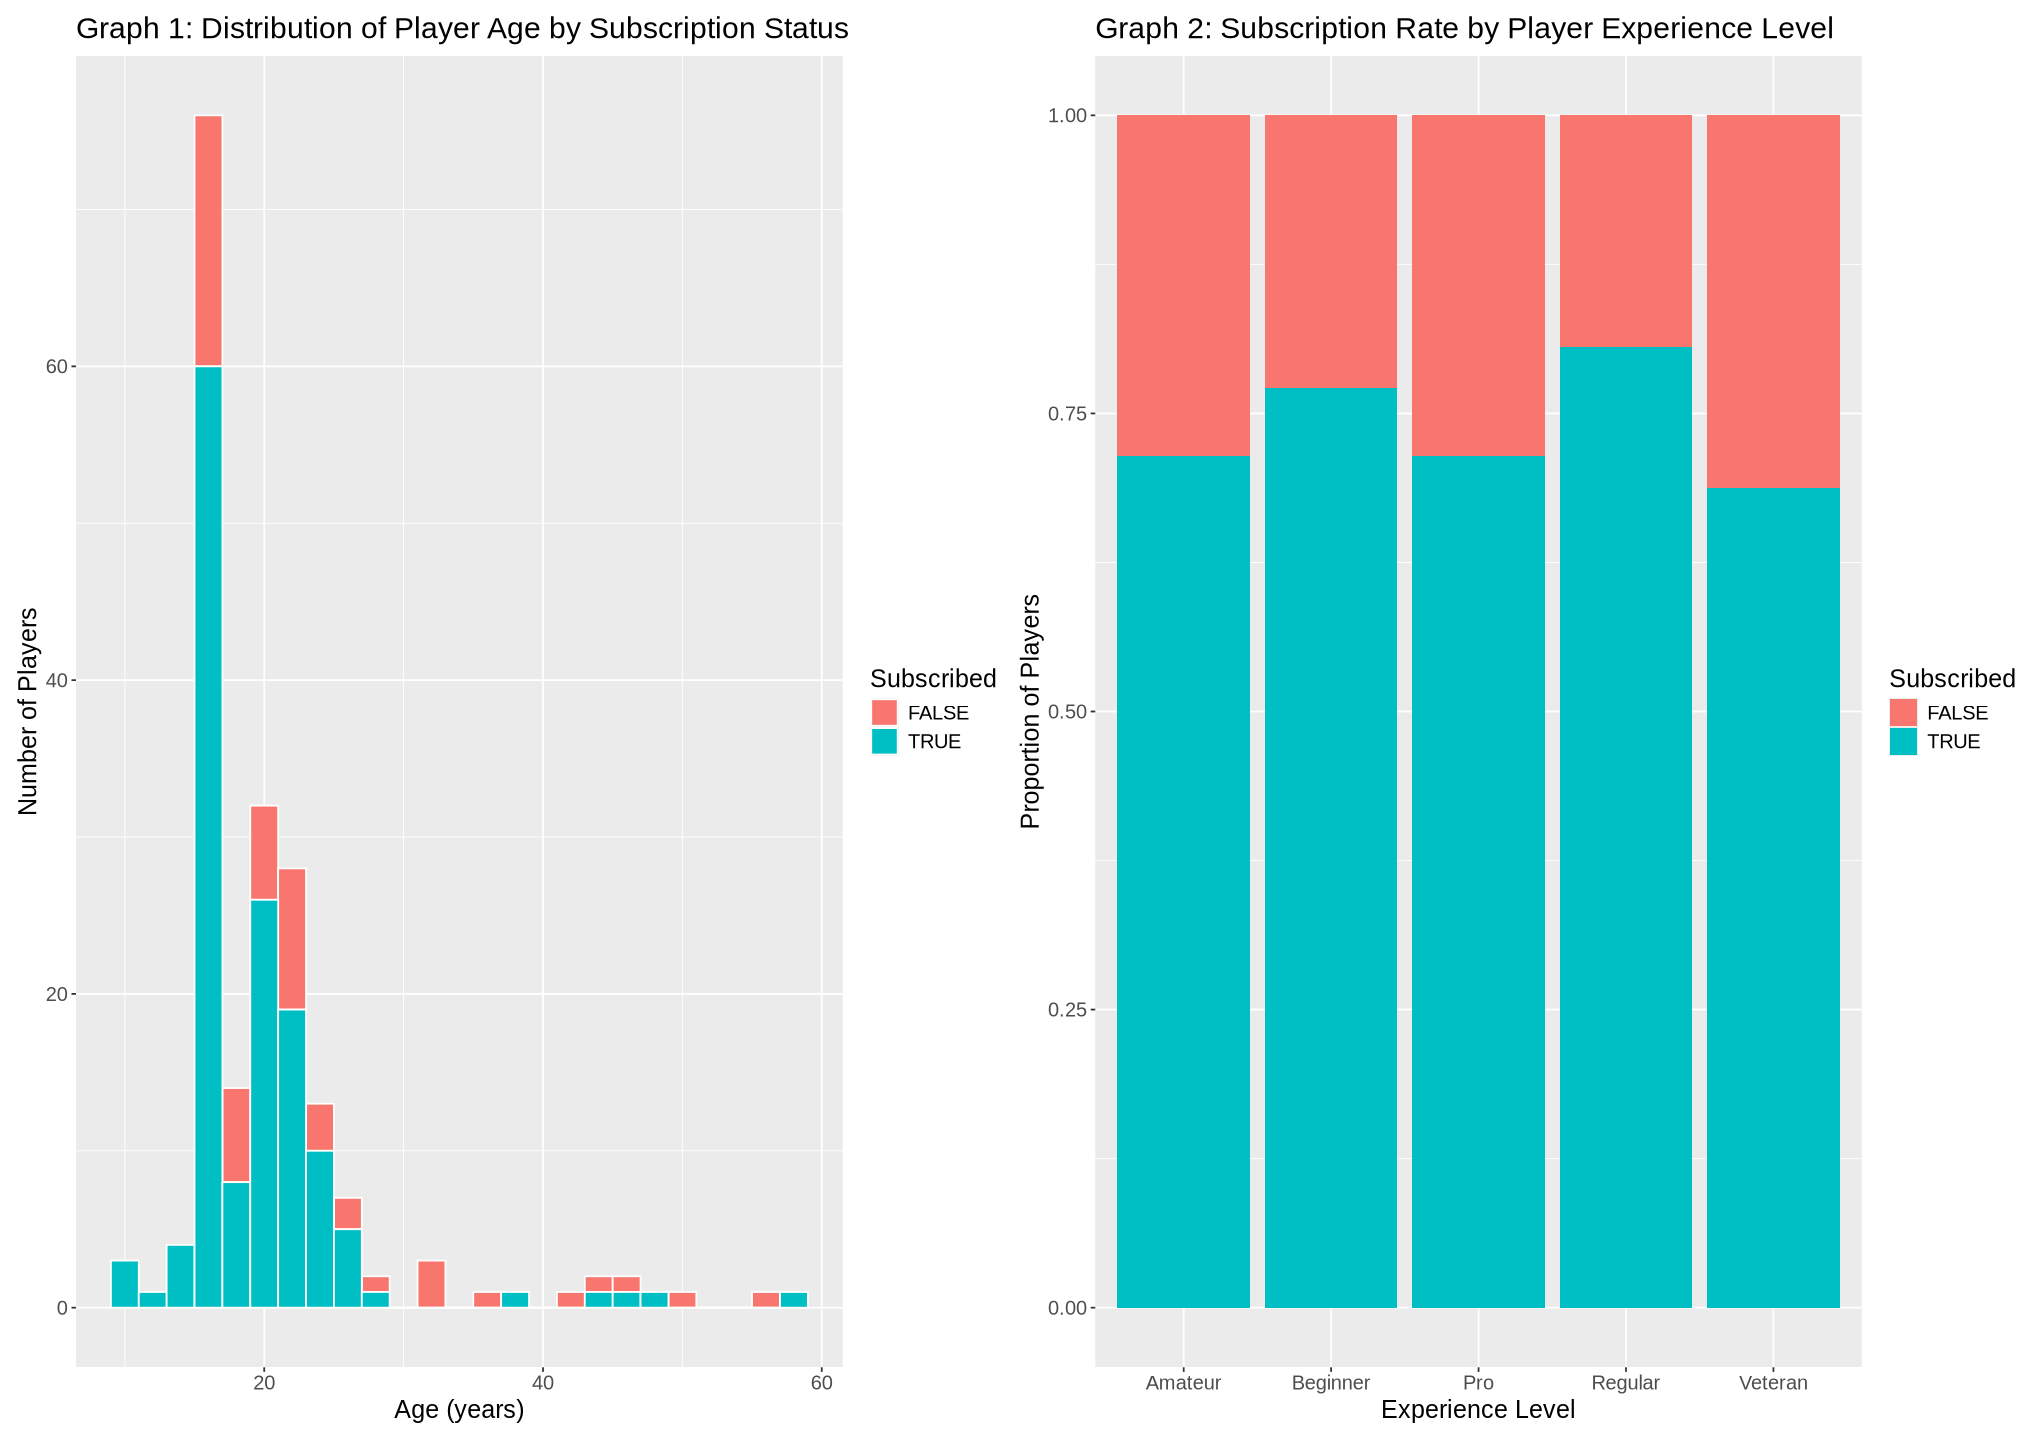

In [5]:
options(repr.plot.width = 17, repr.plot.height = 12) 

Graph_1 <- ggplot(players_tidy, aes(x = Age, fill = subscribe)) +
  geom_histogram(binwidth = 2, color = "white") +
  labs(title = "Graph 1: Distribution of Player Age by Subscription Status",
       x = "Age (years)",
       y = "Number of Players",
       fill = "Subscribed") +
    theme(text = element_text(size = 15))

Graph_2 <- ggplot(players_tidy, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Graph 2: Subscription Rate by Player Experience Level",
       x = "Experience Level",
       y = "Proportion of Players",
       fill = "Subscribed") +
  theme(text = element_text(size = 15))

Graph_1 + Graph_2

The plots show that most players are young, with subscribers concentrated between ages 15–25, suggesting younger users are more engaged. Subscription rates are consistently high across all experience levels, implying that player type may not be a good predictor for subscription likelihood.

## 4. Method and Plan

In this case, we will use the K-nearest neighbor(KNN) classification to solve this problem. The response variable will be a categorical variable `subscribe`, and the predictors will be numerical variables `age` and `played hours`. Therefore, the KNN classification, which uses the numerical variables to predict the class of the observations they belong to, will be the best proper model to use. Also, after general predictions, we will group by the `experience` variable and explore whether the prediction performance varies across different player types.

The KNN model assumes all predictors are measured on comparable scales. We will standardize the variables to ensure that each feature has the same weight in the distance calculation. Also, the KNN model is sensitive to different choices of k. Choosing the improper k will cause overfitting or underfitting. Therefore, we are using a 5-fold cross-validation will be used to determine the optimal number of neighbors.

The data will be initially split by 70%-30% into training and testing datasets. The cross-validation process will also split the training datasets into training and validation sets. Finally, we will use the tested RMSPE to evaluate the model's performance.

## 5. Github Link

https://github.com/Zncufeauag1/DSCI-Project-Plan.git